<a href="https://colab.research.google.com/github/vadim-privalov/-/blob/main/%D0%A2%D0%B5%D0%BA%D1%81%D1%82%D0%BE%D0%B2%D1%8B%D0%B5_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D1%81%D0%B5%D1%82%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ООО "Университет Цифровых Технологий платформа 3"

# Нейронные сети для работы с текстами. Урок 1. Текстовые модели нейросетей



# Введение. Работа с текстами. Получение векторного представления для слов и текстов.

## Введение в обработку естественного языка. Задачи, решаемые с помощью NLP.

NLP - Natural Language Processing (обработка естественного языка) — общее направление искусственного интеллекта и математической лингвистики. Оно изучает проблемы компьютерного анализа и синтеза естественных языков. Применительно к искусственному интеллекту анализ означает понимание языка, а синтез — генерацию грамотного текста (Википедия).

Какие задачи из области NLP можно решать с помощью нейросетевого подхода?
* Классификация текста. Например, оценка тональности отзывов о товаре или о о банке, рейтинг фильма, определение жанра или автора текста.
* Регрессия - использование текстового описания для получения дополнительной информации в задаче оценки квартиры.
* Построить краткую аннотацию текста
* Сегментация - выделение сущностей в тексте.
* Генерация: системы вопрос-ответ, краткий пересказ текста, генерация текста в определенном стиле и т.д.


##Уровни решаемых задач при обработке текстов



1. Уровень сигнала.

        Задачи: распознавание текста, речи, синтез речи.

2. Уровень слов.

        Задачи: морфологический анализ, канонизация, исправление ошибок.

3. Уровень предложений.

        Задачи: определение части речи, распознавание именованных сущностей, выделение слов.

4. Уровень абзацев.

        Задачи: разрешение ссылок, извлечение отношений, анализ эмоциональной окраски, определение языка.

5. Уровень документов.

        Задачи: автоматическая аннотация, перевод, анализ тематики, генерация документов.

6. Уровень корпусов.

        Задачи: убирание дубликатов, информационный поиск.



На уровне сигнала нам нужно преобразовать входной сигнал. Это может быть речь, рукопись, печатный отсканированный текст. Требуется преобразовать его в запись, состоящую из символов, с которыми сможет работать машина.

Дальше идёт уровень слова. Наша задача — понять, что здесь вообще есть слово, провести его морфологический анализ, исправить ошибки, если они есть. Чуть выше — уровень словосочетаний. На нём появляются части речи, которые нужно уметь определять, возникает задача распознавать именованные сущности. В некоторых языках даже задача выделения слов нетривиальна. Например, в немецком языке между словами необязательно стоит пробел, и нам нужно уметь вычленить слова из длинной записи.

Из словосочетаний формируются предложения. Надо их выделить, иногда — провести синтаксический разбор, попробовать сформулировать ответ, если предложение вопросительное, устранить двусмысленность слов, если требуется.

Надо заметить, что эти задачи идут в две стороны: связанные с разбором и с генерацией. В частности, если мы нашли ответ на вопрос, нам нужно создать предложение, которое будет адекватно выглядеть с точки зрения человека, который его прочитает, и отвечать на вопрос.

Предложения группируются в абзацы, и здесь уже возникает вопрос разрешения ссылок и установления отношений между объектами, упомянутыми в разных предложениях.

С абзацами мы можем решать новые задачи: проанализировать эмоциональную окраску текста, определить, на каком языке он написан.

Абзацы формируют документ. На этом уровне работают самые интересные задачи. В частности, семантический анализ (о чём документ?), генерация автоматической аннотации и автоматического summary, перевод и создание документов. Все наверняка слышали об известном генераторе научных статей SCIgen, который создал статью «Корчеватель: Алгоритм типичной унификации точек доступа и избыточности». SCIgen регулярно подвергает испытаниям редакционные коллегии научных журналов.

Но есть задачи, связанные с корпусом в целом. В частности, дедублицировать огромный корпус документов, искать в нём информацию и т. д.

## Особенность текстов на естественном языке в контексте задачи машинного обучения. 

Что такое текст на естественном языке и чем он отличается от других видов информации?

С числовыми данными всё просто. Мы уже умеем работать с ними и обрабатывать их для подачи в нейронную сеть.
Мы научились обрабатывать категориальные признаки, например используя OHE кодирование.
Мы также умеем работать с изображениями, они представляются в матричном виде и хорошо обрабатываются с помощью полносвязных или сверточных сетей.

А вот что такое текст? Конечно, как и любой другой объект, хранящийся на компьютере придумана технология “для оцифровки” - это таблицы кодировок символов и т.д. Но насколько использование кодировок упростит нашу жизнь?
Скорее всего не очень. Для человека слова "глупо", "абсурдно", "неразумно", "нелепо", "несуразно", "бестолково" будут иметь близкие значения, тогда как прямая оцифровка данных слов будет иметь совершенно разные вектора или числа.

Важные аспекты естественного языка:
* Отсутствие четко сформулированных сформулированных “математических правил”.
* Вариативность. Одна и та же мысль может быть передана с помощью разного текста. Но даже сказанное/написанное с ошибкой будет распознано другим носителем с хорошей точностью.
* Изменяемость. Правила применения языка меняются от региона, культурной группы, времени.

## Задача получения векторного представления текста и слов.

Что такое нейронная сеть? По своей сути это очень сложная математическая функция, которая решает задачу оптимизации.  А, как мы понимаем, математика работает с числами.  

Поэтому, прежде чем исследовать архитектуры нейронных сетей, которые могут решать разные задачи из области обработки естественных языков, нам нужно решить первую важную заадачу:
Научиться отображать тексты, написанные на естественных языках, в цифровое (векторное) представление для подачи в нейронную сеть. Говоря проще,нужно научиться представлять слова и тексты в виде чисел.

Как это сделать? Нужно понимать, что не существует единственно-правильного метода. Это новая, бурно развивающаяся область знаний, в которой ведутся активные исследования. Тем не менее, есть уже “классические” варианты и подходы и мы рассмотрим некоторые из них.

Какие из техник применять - зависит от задачи, а также ваших навыков и желания пробовать и экспериментировать.

## Концепция BoW (Bag of Word) или мешок слов.

В основе концепции BoW лежит предположение, что человек или нейронная сеть смогут решить нужную нам задачу,  зная набор слов, находящихся в тексте, но не имея информации о порядке этих слов.

Рассмотрим пример. Пусть мы имеем задачу классификации отзывов на телефоны. Посмотрим на два набора (мешка) слов:
* 'радует', 'и', 'новейший', 'наличие', 'очень', 'андроид', 'плёнки', 'камера', 'чехла', 'экран', 'в', 'хорошая', 'большой', 'оболочка', 'производительность', 'смартфоне', 'яркий', 'защитной', 'автономность', 'нравится'
* 'это', 'и', 'бы', 'форумах-то', 'копаться', 'а', 'можно', 'нашел', 'я', 'недостатков', 'сутки', 'первые', 'накопаю', 'так', 'на', 'есть', 'боюсь', 'чем', 'неделю', 'при', 'из', 'взять', 'за', 'желание', 'что', 'не', 'мучиться', 'если', 'брал', 'то'

Как вы думаете, какой из отзывов позитивный, а какой негативный?

Вот еще пример. Какой из текстов относится к нейронным сетям, а какой к новостям политики?
* 'тренировка', 'cross-entropy', 'функция', 'спуска', 'весов', 'layers', 'градиентного', 'backpropagation', 'с', 'потерь', 'сети', 'fully-connected', 'слоем', 'линейный', 'стохастического', 'алгоритм', 'сеть', 'нейронные', 'одним', 'softmax', 'регуляризация', 'многослойные', 'классификатор', 'нейронная', 'помощью'

* 'по', 'сотрудничества', '', 'человека', 'и', 'сказано', 'выразил', 'биоразнообразие', 'сообщении', 'трем', 'деятельности', 'основным', 'устойчивое', 'развитие', 'числе', 'права', 'мир', 'секретарь', 'с', 'в', 'российской', 'изменение', 'оон', 'организации', 'направлениям', 'безопасность', 'федерацией', 'заинтересованность', 'углублении', 'генеральный', 'том', 'климата'

Итак, в подходе BoW мы сохраняем информацию обо всех значимых словах в тексте, но теряем информацию о порядке этих слов.

# Импортируем  библиотеки

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from pprint import pprint

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Embedding, SpatialDropout1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

In [ ]:
PPRINT_WIDTH = 160 # константа для функции pprint, количество символов в одной строке при выводе

# Загрузка и знакомство с данными

In [ ]:
# Загрузка датасета с сайта
!wget http://dataudt.ru/datasets/texts/kinoposik_sentiment_small.csv

--2021-05-21 12:28:53--  http://dataudt.ru/datasets/texts/kinoposik_sentiment_small.csv
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61515640 (59M) [application/octet-stream]
Saving to: ‘kinoposik_sentiment_small.csv’

kinoposik_sentiment 100%[===================>]  58.67M  13.7MB/s    in 4.3s    

2021-05-21 12:28:57 (13.7 MB/s) - ‘kinoposik_sentiment_small.csv’ saved [61515640/61515640]



In [ ]:
# загрузим данные
text_data = pd.read_csv('/content/kinoposik_sentiment_small.csv')

In [ ]:
text_data.head(3) # посмотрим, что внутри, на примере первых строк

,text,label
0,"Если вы думаете, что так 'наехал' на генерала ...",neg
1,Впервые эту экранизацию классического готическ...,pos
2,"Откровенно говоря, когда я увидел обложку филь...",neg


In [ ]:
text_data.shape # выведем размерность нашего DataFrame

(15000, 2)

In [ ]:
# подсчитаем количество уникальных классов отзывов
n_classes = text_data['label'].nunique()
n_classes

3

In [ ]:
# посмотрим количество записей по каждому классу
text_data['label'].value_counts()

neu    5000
neg    5000
pos    5000
Name: label, dtype: int64

In [ ]:
#  сделаем разделение наших данных на обучение тест с учетом стратификации
train_index, test_index = train_test_split(np.arange(text_data.shape[0]), stratify = text_data['label'])

x_train_raw = text_data.iloc[train_index, 0].values
y_train_raw = text_data.iloc[train_index, 1].values
x_test_raw = text_data.iloc[test_index, 0].values
y_test_raw = text_data.iloc[test_index, 1].values

In [ ]:
# посмотрим на размерность наших данных
x_train_raw.shape, x_test_raw.shape

((11250,), (3750,))

In [ ]:
# посмотрим произвольную  запись (пока "сырой" текст) в обучающей выборке
pprint(x_train_raw[1], width=PPRINT_WIDTH)

('Первая часть «Оно» - эталонный голливудский хоррор. Тот случай, когда «ужас» грамотно чередуется с шутками, скримеры меняются на дружеские подколы, а '
 'саспенс нагнется дозированно. Подобный подход располагает к себе: вроде страшно, а вроде не грузят и развлекают. Хотя дежурные составляющие «ужастика» здесь '
 'играют второстепенную роль. Атмосфера, вот за что все любят «Оно».  Благодаря феноменальной режиссуре Андреса Мускетти киношный Дерри получился живым, а '
 '«Клуб Неудачников» аутентичным. Не стоит забывать об огромном количестве отсылок, трепетном отношении к роману и актерской игре Билла Скарсгарда. Очень '
 'жаль, но сиквел не унаследовал и половины шарма оригинала. Более того, болячки первого фильма за два года разрослись до неприличных размеров.\n'
 '\n'
 '«Оно» под номером два можно смело делить на три части. Именно части, потому что классическая трехактная структура здесь весьма условна. И чем ближе герои '
 'подбираются к разгадке, тем бредовее нарратив. История медл

In [ ]:
# посмотрим на класс данной записи
y_train_raw[1]

'neg'

# Базовые алгоритмы обработки текстов, с использованием Keras

Keras не является специализированной библиотекой по работе с естественным языком. Тем не менее, в Keras предусмотрены инструменты, которые позволяют нам быстро произвести обработку текстов для подачи их в нейронную сеть.
К таким инструментам можно отнести Tokenizer и Embedding слой.

## Использование OHE подхода

Первым, базовым алгоритмом "векторизации" текста является OHE (One Hot Encoding)  нашего мешка слов.

Алгоритм заключается в следующем:
1. Мы разбиваем текст на отдельные единицы смысла - токены. В простейшем случае один токен равен одному слову.
2. Мы считаем, сколько раз каждый токен встретился во всех наших текстах.
3. Выбираем **NUM_WORDS**   - количество слов, которые будем учитывать в нашей модели. Скорее всего **NUM_WORDS** будет меньше, чем общее количество слов в обучающих текстах.
4. Упорядочим все слова по частоте и выберем **NUM_WORDS** самых часто используемых слов.
5. Зададим специальный токен UNKNOWN для кодирования слов, не вошедших в самые часто встречаемые слова.
6. Токену UNKNOWN присвоим номер 1, все остальные слова также пронумеруем числами от 2 до **NUM_WORDS** + 1.
7. Индес 0 пока не используем, он нам понадобится для заадчи выравнивания последовательностей.

Теперь любой текст мы можем закодировать вектором длинной **NUM_WORDS** + 1.
*  Если слово с номером (индексом) i присутствует в тексте, то в ячейку с этим номером мы ставим 1
*  Если слово с номером (индексом) i в тексте не встречается, то в ячейку с этим номером мы ставим 0

### Tokenizer + OHE формат

В данном разделе мы будем использовать специальный объект Keras Tokenizer.
У Tokenizer есть несколько основных методов, помогающим нам в работе с текстами:
1. fit_on_texts - обновляет внутреннюю лексику на основе списка текстов. Он предобрабатывает текст, может привести слова к нижнему регистру, убирает лишние "мусорные" символы. Затем он создает словарный индекс на основании частоты слов.
2. texts_to_sequences - преобразует каждый текст в текстах в последовательность целых чисел (индексов) 
3. sequences_to_texts - делает обратное преобразование последовательности индексов в слова
4. text_to_matrix - преобразует наши тексты в вектора в формате One Hot Encoding

После обучения Tokenizer нам доступны:
1. Словарь index_word - соответствие индексов и слов (токенов)
2. Словарь word_index - соответствие слов (токенов) и индексов


In [ ]:
NUM_WORDS = 20000 # константа, максимальное количество слов, которые будет учитывать наша модель

# создадим наш Токенайзер
tokenizer = Tokenizer(num_words=NUM_WORDS, # максимальное количество слов, которые будет учитывать наш токенайзер
                      filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', # символы, которые он токенайзер будет фильтровать
                      lower=True,  #приводятся ли все символы к нижнему регситру
                      split=' ',  # символ, по которому происходит разделение на слова (токены)
                      char_level=False,  # являются ли токенами отдельные буквы
                      oov_token='UNKNOWN' # токен для неизвестных слов 
                     )

tokenizer.fit_on_texts(x_train_raw) # обучим наш токенайзер на обучающих текстах

In [ ]:
tokenizer.index_word[5] # посмотрим, какое слово хранится в словаре токенайзера с индексом 5

'что'

In [ ]:
x_train_seq = tokenizer.texts_to_sequences(x_train_raw) # преобразуем наши тексты в последовательность токенов (индексов слов)

In [ ]:
pprint(x_train_seq[1], compact=True, width=PPRINT_WIDTH) # посмотрим, как закодирована один из отзывов

[488, 188, 331, 1, 5240, 1523, 157, 1214, 50, 1012, 2166, 1, 7, 2629, 1, 3524, 6, 12354, 1, 12, 3628, 1, 1, 2350, 2774, 7681, 18, 107, 218, 937, 12, 218, 4, 1,
 2, 1, 71, 1, 4449, 4232, 68, 697, 16951, 137, 497, 45, 22, 5, 17, 1336, 331, 419, 1, 4893, 1, 18654, 16952, 1, 336, 4450, 12, 5387, 13292, 1, 4, 120, 2694,
 175, 6382, 3525, 6383, 1, 2043, 18, 4947, 2, 952, 722, 7682, 1, 28, 494, 8, 1491, 4, 1, 2, 2678, 7683, 1576, 78, 65, 1, 516, 30, 22, 249, 233, 1, 52, 1, 9767,
 331, 110, 14909, 249, 39, 1237, 13798, 6, 425, 180, 94, 180, 102, 5, 5479, 1, 9029, 68, 207, 1, 2, 60, 841, 182, 1, 18, 14314, 90, 1, 1, 127, 1998, 13799, 3,
 1, 1, 5161, 2271, 52, 7684, 680, 10317, 4, 2075, 24, 10047, 8, 6857, 3, 425, 490, 7130, 1, 33, 6266, 999, 7, 238, 234, 358, 239, 3315, 1, 839, 5387, 13292,
 567, 1, 4, 1, 75, 33, 3, 985, 38, 3526, 5562, 1278, 12355, 1655, 6165, 137, 9, 68, 18655, 26, 6166, 74, 9768, 92, 4, 10908, 19, 3083, 230, 18, 9030, 488, 5837,
 1661, 1117, 2095, 30, 1, 1800, 974, 5024, 12,

In [ ]:
# а теперь попробуем сделать обратное декодирование нашей последовательности в текст
# это позволит нам понять, какие данные видит нейронная сеть
text = ' '
for i in x_train_seq[1]:
    text += tokenizer.index_word[i] + ' '
pprint(text, width=PPRINT_WIDTH)

(' первая часть оно UNKNOWN голливудский хоррор тот случай когда ужас грамотно UNKNOWN с шутками UNKNOWN меняются на дружеские UNKNOWN а саспенс UNKNOWN '
 'UNKNOWN подобный подход располагает к себе вроде страшно а вроде не UNKNOWN и UNKNOWN хотя UNKNOWN составляющие ужастика здесь играют второстепенную роль '
 'атмосфера вот за что все любят оно благодаря UNKNOWN режиссуре UNKNOWN мускетти киношный UNKNOWN получился живым а клуб неудачников UNKNOWN не стоит '
 'забывать об огромном количестве отсылок UNKNOWN отношении к роману и актерской игре билла UNKNOWN очень жаль но сиквел не UNKNOWN и половины шарма оригинала '
 'более того UNKNOWN первого фильма за два года UNKNOWN до UNKNOWN размеров оно под номером два можно смело делить на три части именно части потому что '
 'классическая UNKNOWN структура здесь весьма UNKNOWN и чем ближе герои UNKNOWN к разгадке тем UNKNOWN UNKNOWN история медленно катится в UNKNOWN UNKNOWN '
 'градус абсурда до высшей точки ленивый не написал о хронометр

In [ ]:
# Преобразуем наши текстовые данные в формат One Hot Encoding
x_train_01 = tokenizer.texts_to_matrix(x_train_raw)
x_test_01 = tokenizer.texts_to_matrix(x_test_raw)

In [ ]:
x_train_01.shape # посмотрим на форму полученного массива с обучающими данными

(11250, 20000)

In [ ]:
# закодируем нашу целевую переменную (класс отзыва) в формат OHE для подачи в нейронную сеть
target_encoeder = OneHotEncoder(sparse=False) # создадим объект Encoder
target_encoeder.fit(y_train_raw.reshape([-1, 1])) # обучим его на целевом признаке из обучающих данных

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [ ]:
# сохраним названия классов в отдельную переменную, это понадобится нам на этапе предсказани
classes_names = target_encoeder.categories_[0] # названия классов хранятся в .categories_[0]
classes_names

array(['neg', 'neu', 'pos'], dtype=object)

In [ ]:
# приведем наши целевые переменные из называний в формат OHO для подачи в нейронную сеть
y_train_01 = target_encoeder.transform(y_train_raw.reshape([-1, 1]))
y_test_01 = target_encoeder.transform(y_test_raw.reshape([-1, 1]))

In [ ]:
y_train_01.shape # посмотрим на размерность полученных данных

(11250, 3)

### Создание и обучение модели

In [ ]:
# создадим простую модель с одним внутренним полносвязным слоем
model01 = Sequential()
model01.add(Dense(64, input_dim=NUM_WORDS, activation='relu'))
model01.add(BatchNormalization())
model01.add(Dropout(0.4))
model01.add(Dense(n_classes,activation='softmax'))

model01.compile(optimizer=Adam(learning_rate=0.001),  loss='categorical_crossentropy',  metrics=['accuracy'])

model01.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1280064   
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 1,280,515
Trainable params: 1,280,387
Non-trainable params: 128
_________________________________________________________________


In [ ]:
# обучим модель
model01.fit(x = x_train_01,  y = y_train_01, epochs = 5, verbose = 1, validation_data= (x_test_01, y_test_01))

Epoch 1/5
352/352 [==============================] - 4s 9ms/step - loss: 1.0662 - accuracy: 0.5389 - val_loss: 0.7446 - val_accuracy: 0.6709
Epoch 2/5
352/352 [==============================] - 3s 7ms/step - loss: 0.4400 - accuracy: 0.8434 - val_loss: 0.7932 - val_accuracy: 0.6765
Epoch 3/5
352/352 [==============================] - 3s 7ms/step - loss: 0.2489 - accuracy: 0.9218 - val_loss: 0.9153 - val_accuracy: 0.6563
Epoch 4/5
352/352 [==============================] - 3s 7ms/step - loss: 0.1533 - accuracy: 0.9545 - val_loss: 1.0903 - val_accuracy: 0.6499
Epoch 5/5
352/352 [==============================] - 3s 7ms/step - loss: 0.1170 - accuracy: 0.9612 - val_loss: 1.1607 - val_accuracy: 0.6445


### Инференс модели

Инференс - это эксплуатация обученной модели.
В данном разделе мы покажем, как с помощью обученной модели классифицировать новый отзыв, в том числе как провести преддобработку отзыва, а также как по предсказанию модели определить класс отзыва.

In [ ]:
# создадим новый отзыв и попробуем использовать обученную модель для предсказания "класса" данного отзыва
new_rewiew = """ Если вы еще не видели этот фильм, вам действительно стоит это сделать. Я не помню со времён 'Мертвеца ' и 'Дон Жуан де Марко ' ещё какую-то столь же яркую роль Деппа.
Знакомьтесь — Джон Уилмот граф Рочестер, поэт, драматург, сатирик, бунтарь, безбожник, распутник, любимец женщин, фаворит короля. Последнего, кстати, Карла II по прозвищу 'Весёлый король', уставшего уже от эпохи распуства и пытающегося внести хоть какой-то порядок в государственные дела, сына убитого Кромвелем Карла I, обладателя большого кривого носа превосходно сыграл Джон Малкович.
'Распутник' снят по реальным событиям. Сам по себе Джон Уилмот был личность незаурядная, яркая. Ещё при своей жизни он послужил прототипом персонажей для нескольких театральных пьес. Что уж говорить, что после смерти интерес к нему никак не ослабел. В 1994 году драматург Стивен Джефриз написал пьесу 'The Libertine', которая шла на сцене Лондонского Королевского Театра (с Джоном Малковичем в главной роли). В 2004 режиссёр Лоренс Данмор экранизирует пьесу Джефриза, тем самым увековечив удивительную жизнь графа Рочестера в кинематографе.
Жизнь и вправду была не скучная — похитил богатую невесту, отсидел в Тауре (правда недолго), воевал на флоте (где отличился), снова похитил невесту (на этот раз женился), писал стихи и пьесы (в том числе похабные, в том числе сатиры на короля), был отлучен от Двора (опять же не надолго), ну и, конечно, попойки, карты, женщины и... театр.
"""

In [ ]:
# выведем наш отзыв на печать
pprint(new_rewiew, width=PPRINT_WIDTH)

(" Если вы еще не видели этот фильм, вам действительно стоит это сделать. Я не помню со времён 'Мертвеца ' и 'Дон Жуан де Марко ' ещё какую-то столь же яркую "
 'роль Деппа.\n'
 'Знакомьтесь — Джон Уилмот граф Рочестер, поэт, драматург, сатирик, бунтарь, безбожник, распутник, любимец женщин, фаворит короля. Последнего, кстати, Карла '
 "II по прозвищу 'Весёлый король', уставшего уже от эпохи распуства и пытающегося внести хоть какой-то порядок в государственные дела, сына убитого Кромвелем "
 'Карла I, обладателя большого кривого носа превосходно сыграл Джон Малкович.\n'
 "'Распутник' снят по реальным событиям. Сам по себе Джон Уилмот был личность незаурядная, яркая. Ещё при своей жизни он послужил прототипом персонажей для "
 "нескольких театральных пьес. Что уж говорить, что после смерти интерес к нему никак не ослабел. В 1994 году драматург Стивен Джефриз написал пьесу 'The "
 "Libertine', которая шла на сцене Лондонского Королевского Театра (с Джоном Малковичем в главной роли). В 2

In [ ]:
# переведем наш отзыв в OHO представление с помощью обученного токенайзера
review_to_oho = tokenizer.texts_to_matrix([new_rewiew])
review_to_oho.shape

(1, 20000)

In [ ]:
# получим предсказание в виде вероятностей каждого класса
pred = model01.predict(review_to_oho)

# вычислим класс, вероятность которого максимальная
num_class = np.argmax(pred)

In [ ]:
num_class # посмотрим номер этого класса

1

In [ ]:
# выведем текстовую метку класса отзыва
classes_names[num_class]

'neu'

## Использование Embedding

Мы научились кодировать слова и тексты с помощью OHE. Но значимых слов в тексте может быть очень много, соответственно вырастает и размерность пространства (напомним, что в OHE подходе каждому слову соответствует своя размерность).
А что если попробовать перевести все слова в пространство размером N, где N сильно меньше чем количество слов? Например, при количестве слов 50 000 мы можем захотеть переместить их все в пространство размерностью 100 (200 или 300).
Именно эту задачу и решает слой Embedding. Он хранит (и обучает) векторное представление для каждого слова.
Интересен также побочный эффект: если взять обученный Embedding, то часто векторные представления близких по значению слов расположены в N-мерном пространстве ближе друг к другу, чем слова, далекие по значению.

Keras предлагает нам готовый слой - Embedding. Основные аргументы данного слоя:
1. input_dim - количество используемых слов, для которых нужно выучить векторное представление
2. output_dim - размерность вектора "представления слова", т.е. векторного пространства, в которое мы переводим наши слова
3. input_length - длинна последовательности (количество слов в отрезке текста)

### Подготовка обучающей выборки

In [ ]:
NUM_WORDS = 20000 # количество слов в словаре

# объявляем наш tokenizer
tokenizer = Tokenizer(num_words=NUM_WORDS,
                      filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff',
                      lower=True, split=' ', char_level=False, oov_token='UNKNOWN'
                     )
# обучаем tokenizer на текстах, составляем словарь частотности  
tokenizer.fit_on_texts(x_train_raw)

In [ ]:
# переводим наши тексты в последовательность индексов (токенов) с помощью tokenizer
x_train_seq = tokenizer.texts_to_sequences(x_train_raw)
x_test_seq = tokenizer.texts_to_sequences(x_test_raw)

На следующем шаге нам  нужно рассчитать оптимальную длину последовательности. Для этого исследуем такой показатель, как количество слов в текстах, находящихся в обучающей выборке (среднее количество слов в отзыве).

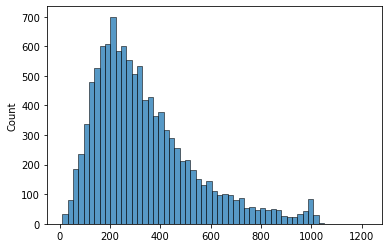

In [ ]:
# построим гистограмму для количества слов в отзывах
sns.histplot([len(x) for x in x_train_seq])

In [ ]:
# объявим функцию для чистки наших последовательностей от тега unknown
# мы предполагаем, что наличие тега unknown не несет значимой информации
def drop_UNKNOWN (x_seq, unknown=1):
    x_seq_short = []
    for x in x_seq:
        x_ = np.array(x)
        x_ = x_[np.where(x_ !=unknown )]
        x_seq_short.append(list(x_))
    return x_seq_short

In [ ]:
# очистим наши последовательности, полученные из обучающей и тестовой выборок
# от тега unknown с использованием объявленной функции 
x_train_seq_short = drop_UNKNOWN(x_train_seq)
x_test_seq_short = drop_UNKNOWN(x_test_seq)

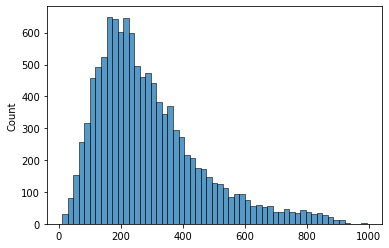

In [ ]:
# построим гистограмму количества токенов для последовательностей
# из которых был удален тег unknown
sns.histplot([len(x) for x in x_train_seq_short])

Анализируя графики мы делаем вывод, что большая часть наших отзывов имеет длинну последовательности токенов меньшую или равную 800.

In [ ]:
# устанавливаем максимальную длинну последовательности токенов
MAX_LEN_SEQ = 800

In [ ]:
# вырвниваем длинну всех последовательностей токенов до MAX_LEN_SEQ
# при помощи стандартного инструмента pad_sequence, входящего в Keras
# при этом последовательности короче MAX_LEN_SEQ будут дополнены нулями
# а последовательности длиннее MAX_LEN_SEQ будут обрезаны

x_train_emb = pad_sequences(x_train_seq_short, padding='post', maxlen=MAX_LEN_SEQ)
x_test_emb = pad_sequences(x_test_seq_short, padding='post', maxlen=MAX_LEN_SEQ)

In [ ]:
# объявляем кодировщик для целевого признака (класса отзыва)
# используем стандартный OneHotEncoder из библиотеки Sklearn
target_encoeder = OneHotEncoder(sparse=False)

# обучаем наш кодировщик на целевых призаках обучающей выборки
target_encoeder.fit(y_train_raw.reshape([-1, 1]))

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [ ]:
# объявляем переменную classes_names, в которой сохраним матрицу
# с названиями классов (тип отзыва)
# названия классов понадобятся нам на этапе инференса
classes_names = target_encoeder.categories_[0]
classes_names

array(['neg', 'neu', 'pos'], dtype=object)

In [ ]:
# переведем целевые переменные для обучающей и тестовой выборки в формат OHE
# это нужно для подачи в модель

y_train_01 = target_encoeder.transform(y_train_raw.reshape([-1, 1]))
y_test_01 = target_encoeder.transform(y_test_raw.reshape([-1, 1]))

### Создание и обучение модели

In [ ]:
# объявим нашу модель
modelEmb = Sequential() # объявляем нашу модель как последовательность слоев
# добавляем слой Embedding
modelEmb.add(Embedding(input_dim=NUM_WORDS, output_dim=200, input_length=MAX_LEN_SEQ))
# добавляем слой SpatialDropout1D для "прореживания" и борьбы с переобучением
modelEmb.add(SpatialDropout1D(0.5)) 
# добавим выравнивающий слой
modelEmb.add(Flatten())
# добавим Dense слой на 16 нейронов
modelEmb.add(Dense(16,  activation='relu'))
# добавим батч-нормализацию для борьбы с переобучением 
modelEmb.add(BatchNormalization())
# добавим прореживание для борьбы с переобучением
modelEmb.add(Dropout(0.2))
# добавим выходной полносвязный слой для классификации
modelEmb.add(Dense(n_classes,activation='softmax'))

# компилируем модель
modelEmb.compile(optimizer=Adam(learning_rate=0.001),  loss='categorical_crossentropy',  metrics=['accuracy'])
 
# выводим данные по модели
modelEmb.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 800, 200)          4000000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 800, 200)          0         
_________________________________________________________________
flatten (Flatten)            (None, 160000)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                2560016   
_________________________________________________________________
batch_normalization_1 (Batch (None, 16)                64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                

In [ ]:
# обучаем модель
modelEmb.fit(x = x_train_emb,  y = y_train_01, epochs = 10, verbose = 1, validation_data= (x_test_emb, y_test_01))

Epoch 1/10
352/352 [==============================] - 22s 61ms/step - loss: 1.2252 - accuracy: 0.3375 - val_loss: 1.0961 - val_accuracy: 0.3547
Epoch 2/10
352/352 [==============================] - 21s 60ms/step - loss: 1.0680 - accuracy: 0.4169 - val_loss: 1.0060 - val_accuracy: 0.5187
Epoch 3/10
352/352 [==============================] - 21s 60ms/step - loss: 0.4945 - accuracy: 0.8334 - val_loss: 0.9505 - val_accuracy: 0.5595
Epoch 4/10
352/352 [==============================] - 23s 66ms/step - loss: 0.1261 - accuracy: 0.9759 - val_loss: 0.9525 - val_accuracy: 0.5701
Epoch 5/10
352/352 [==============================] - 22s 61ms/step - loss: 0.0435 - accuracy: 0.9937 - val_loss: 1.0570 - val_accuracy: 0.5552
Epoch 6/10
352/352 [==============================] - 22s 61ms/step - loss: 0.0235 - accuracy: 0.9971 - val_loss: 1.0678 - val_accuracy: 0.5813
Epoch 7/10
352/352 [==============================] - 21s 60ms/step - loss: 0.0178 - accuracy: 0.9983 - val_loss: 1.0814 - val_accuracy:

### Инференс модели

In [ ]:
# создадим новый отзыв, по которому мы хотим получить предсказание
new_rewiew = """ Если вы еще не видели этот фильм, вам действительно стоит это сделать. Я не помню со времён 'Мертвеца ' и 'Дон Жуан де Марко ' ещё какую-то столь же яркую роль Деппа.
Знакомьтесь — Джон Уилмот граф Рочестер, поэт, драматург, сатирик, бунтарь, безбожник, распутник, любимец женщин, фаворит короля. Последнего, кстати, Карла II по прозвищу 'Весёлый король', уставшего уже от эпохи распуства и пытающегося внести хоть какой-то порядок в государственные дела, сына убитого Кромвелем Карла I, обладателя большого кривого носа превосходно сыграл Джон Малкович.
'Распутник' снят по реальным событиям. Сам по себе Джон Уилмот был личность незаурядная, яркая. Ещё при своей жизни он послужил прототипом персонажей для нескольких театральных пьес. Что уж говорить, что после смерти интерес к нему никак не ослабел. В 1994 году драматург Стивен Джефриз написал пьесу 'The Libertine', которая шла на сцене Лондонского Королевского Театра (с Джоном Малковичем в главной роли). В 2004 режиссёр Лоренс Данмор экранизирует пьесу Джефриза, тем самым увековечив удивительную жизнь графа Рочестера в кинематографе.
Жизнь и вправду была не скучная — похитил богатую невесту, отсидел в Тауре (правда недолго), воевал на флоте (где отличился), снова похитил невесту (на этот раз женился), писал стихи и пьесы (в том числе похабные, в том числе сатиры на короля), был отлучен от Двора (опять же не надолго), ну и, конечно, попойки, карты, женщины и... театр.
"""

In [ ]:
# выведем отзыв на печать
pprint(new_rewiew, width=PPRINT_WIDTH)

(" Если вы еще не видели этот фильм, вам действительно стоит это сделать. Я не помню со времён 'Мертвеца ' и 'Дон Жуан де Марко ' ещё какую-то столь же яркую "
 'роль Деппа.\n'
 'Знакомьтесь — Джон Уилмот граф Рочестер, поэт, драматург, сатирик, бунтарь, безбожник, распутник, любимец женщин, фаворит короля. Последнего, кстати, Карла '
 "II по прозвищу 'Весёлый король', уставшего уже от эпохи распуства и пытающегося внести хоть какой-то порядок в государственные дела, сына убитого Кромвелем "
 'Карла I, обладателя большого кривого носа превосходно сыграл Джон Малкович.\n'
 "'Распутник' снят по реальным событиям. Сам по себе Джон Уилмот был личность незаурядная, яркая. Ещё при своей жизни он послужил прототипом персонажей для "
 "нескольких театральных пьес. Что уж говорить, что после смерти интерес к нему никак не ослабел. В 1994 году драматург Стивен Джефриз написал пьесу 'The "
 "Libertine', которая шла на сцене Лондонского Королевского Театра (с Джоном Малковичем в главной роли). В 2

In [ ]:
review_to_seq = tokenizer.texts_to_sequences([new_rewiew]) # преобразуем наш отзыв в последовательность индексов 
review_to_seq = drop_UNKNOWN(review_to_seq) # удалим из отзыва тег UNKNOWN
review_to_emb = pad_sequences(review_to_seq, padding='post', maxlen=MAX_LEN_SEQ) # выравняем длинну наше последовательности до MAX_LEN_SEQ

In [ ]:
pred = modelEmb.predict(review_to_emb) # получим предсказание нашей модели в виде вероятностей по каждому классу
num_class = np.argmax(pred)  # получим номер наиболее вероятного класса

In [ ]:
num_class # посмотрим номер наиболее вероятного класса

1

In [ ]:
classes_names[num_class] # выведем название класса, предсказанного моделью 

'neu'

# Дополнительные алгоритмы и продвинутые методы работы с текстами

Теперь, когда мы рассмотрели базовые алгоритмы подготовки текстов к подаче в нейронную сеть рассмотрим, какие еще существуют подходы и техники к работе с текстами. 
Вы можете использовать их как по отдельности, так и в сочетании друг с другом и ранее изученными алгоритмами.

В данном разделе мы рассмотрим три базовые темы:
1. Превращение текста в списки слов (токенов)
2. Векторизация с использованием алгоритмов из библиотеки SKlearn
3. Word2Vec


Установим и импортируем библиотеки, которые нам понадобятся в этом разделе.

In [ ]:
!pip install -q pymorphy2 # установим библиотеку pymorphy 

     |████████████████████████████████| 61kB 2.4MB/s 
     |████████████████████████████████| 8.2MB 5.2MB/s 


In [ ]:
# импортируем специализированные библиотеки nltk, pymorphy2 и gensim
# это специализированные библиотеки для работы с естественным языком
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import SnowballStemmer

import pymorphy2

from gensim.models.word2vec import Word2Vec
from gensim.utils import simple_preprocess
import gensim.downloader as api

nltk.download('stopwords')
nltk.download('punkt')

# из библиотеки Sklearn импортируем три наиболее популярных Vectorizer для работы с текстами
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Токенизация, удаление стоп-слов

Первым этапом при работе с текстом является его токенизация, т.е. разбиение на составные части. При этом на первом этапе мы можем весь текст разбить на составные единицы - предложения, а предложения в свою очередь разбить на отдельные слова (токены)

Мы уже изучили Tokenizer, входящий в Keras.  Нужно также понимать, что Keras не является специализированным NLP-пакетом, и Keras Tokenizer имеет только базовый функционал. Посмотрим, как применять токенизацию на примере функций sent_tokenize и word_tokenize, входящих в состав библиотеки nltk. 

Еще одной концепцией, которую нам нужно понять являются стоп-слова (stop-words). Основная мысль этой концепции заключается в том, что не все слова несут нашей модели полезную информацию. Такие слова как "и", "в", "на", "это", "по" и т.д. скорее будут мешать нашей модели находить что-то по настоящему полезное.
Нам будет полезно избавиться от этих слов на этапе предобработки. Мы воспользуемся готовым списком русских стоп-слов (stopwords из библиотеки nltk).

In [ ]:
# возьмем любой отзыв, на котором будем показывать технику работы с текстами
new_rewiew = """ Если вы еще не видели этот фильм, вам действительно стоит это сделать. Я не помню со времён 'Мертвеца ' и 'Дон Жуан де Марко ' ещё какую-то столь же яркую роль Деппа.
Знакомьтесь — Джон Уилмот граф Рочестер, поэт, драматург, сатирик, бунтарь, безбожник, распутник, любимец женщин, фаворит короля. Последнего, кстати, Карла II по прозвищу 'Весёлый король', уставшего уже от эпохи распуства и пытающегося внести хоть какой-то порядок в государственные дела, сына убитого Кромвелем Карла I, обладателя большого кривого носа превосходно сыграл Джон Малкович.
'Распутник' снят по реальным событиям. Сам по себе Джон Уилмот был личность незаурядная, яркая. Ещё при своей жизни он послужил прототипом персонажей для нескольких театральных пьес. Что уж говорить, что после смерти интерес к нему никак не ослабел. В 1994 году драматург Стивен Джефриз написал пьесу 'The Libertine', которая шла на сцене Лондонского Королевского Театра (с Джоном Малковичем в главной роли). В 2004 режиссёр Лоренс Данмор экранизирует пьесу Джефриза, тем самым увековечив удивительную жизнь графа Рочестера в кинематографе.
Жизнь и вправду была не скучная — похитил богатую невесту, отсидел в Тауре (правда недолго), воевал на флоте (где отличился), снова похитил невесту (на этот раз женился), писал стихи и пьесы (в том числе похабные, в том числе сатиры на короля), был отлучен от Двора (опять же не надолго), ну и, конечно, попойки, карты, женщины и... театр.
"""

In [ ]:
# при помощи функции sent_tokenize разобъем наш отзыв на отдельные предожения 
ss = sent_tokenize(new_rewiew)

In [ ]:
len(ss) # посмотрим на количество получившихся предожений

11

In [ ]:
pprint(ss, width=PPRINT_WIDTH) # посмотрим на полученный список предложений

[' Если вы еще не видели этот фильм, вам действительно стоит это сделать.',
 "Я не помню со времён 'Мертвеца ' и 'Дон Жуан де Марко ' ещё какую-то столь же яркую роль Деппа.",
 'Знакомьтесь — Джон Уилмот граф Рочестер, поэт, драматург, сатирик, бунтарь, безбожник, распутник, любимец женщин, фаворит короля.',
 "Последнего, кстати, Карла II по прозвищу 'Весёлый король', уставшего уже от эпохи распуства и пытающегося внести хоть какой-то порядок в государственные "
 'дела, сына убитого Кромвелем Карла I, обладателя большого кривого носа превосходно сыграл Джон Малкович.',
 "'Распутник' снят по реальным событиям.",
 'Сам по себе Джон Уилмот был личность незаурядная, яркая.',
 'Ещё при своей жизни он послужил прототипом персонажей для нескольких театральных пьес.',
 'Что уж говорить, что после смерти интерес к нему никак не ослабел.',
 "В 1994 году драматург Стивен Джефриз написал пьесу 'The Libertine', которая шла на сцене Лондонского Королевского Театра (с Джоном Малковичем в главной "
 '

In [ ]:
# разобъем наш текст на слова с использованием word_tokenize из пакета nltk  
tokens = word_tokenize(new_rewiew, language='russian')

In [ ]:
# выведем список получившихся слов (токенов) на печать
pprint(tokens, compact=True, width=PPRINT_WIDTH)

['Если', 'вы', 'еще', 'не', 'видели', 'этот', 'фильм', ',', 'вам', 'действительно', 'стоит', 'это', 'сделать', '.', 'Я', 'не', 'помню', 'со', 'времён',
 "'Мертвеца", "'", 'и', "'Дон", 'Жуан', 'де', 'Марко', "'", 'ещё', 'какую-то', 'столь', 'же', 'яркую', 'роль', 'Деппа', '.', 'Знакомьтесь', '—', 'Джон',
 'Уилмот', 'граф', 'Рочестер', ',', 'поэт', ',', 'драматург', ',', 'сатирик', ',', 'бунтарь', ',', 'безбожник', ',', 'распутник', ',', 'любимец', 'женщин', ',',
 'фаворит', 'короля', '.', 'Последнего', ',', 'кстати', ',', 'Карла', 'II', 'по', 'прозвищу', "'Весёлый", 'король', "'", ',', 'уставшего', 'уже', 'от', 'эпохи',
 'распуства', 'и', 'пытающегося', 'внести', 'хоть', 'какой-то', 'порядок', 'в', 'государственные', 'дела', ',', 'сына', 'убитого', 'Кромвелем', 'Карла', 'I',
 ',', 'обладателя', 'большого', 'кривого', 'носа', 'превосходно', 'сыграл', 'Джон', 'Малкович', '.', "'Распутник", "'", 'снят', 'по', 'реальным', 'событиям',
 '.', 'Сам', 'по', 'себе', 'Джон', 'Уилмот', 'был', 'личн

In [ ]:
# очистим наш список токенов от пунктуации и знаков препинания
tokens = [i for i in tokens if (i not in '!"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~')]

In [ ]:
# посмотрим на результат
pprint(tokens, compact=True, width=PPRINT_WIDTH)

['Если', 'вы', 'еще', 'не', 'видели', 'этот', 'фильм', 'вам', 'действительно', 'стоит', 'это', 'сделать', 'Я', 'не', 'помню', 'со', 'времён', "'Мертвеца", 'и',
 "'Дон", 'Жуан', 'де', 'Марко', 'ещё', 'какую-то', 'столь', 'же', 'яркую', 'роль', 'Деппа', 'Знакомьтесь', '—', 'Джон', 'Уилмот', 'граф', 'Рочестер', 'поэт',
 'драматург', 'сатирик', 'бунтарь', 'безбожник', 'распутник', 'любимец', 'женщин', 'фаворит', 'короля', 'Последнего', 'кстати', 'Карла', 'II', 'по', 'прозвищу',
 "'Весёлый", 'король', 'уставшего', 'уже', 'от', 'эпохи', 'распуства', 'и', 'пытающегося', 'внести', 'хоть', 'какой-то', 'порядок', 'в', 'государственные',
 'дела', 'сына', 'убитого', 'Кромвелем', 'Карла', 'I', 'обладателя', 'большого', 'кривого', 'носа', 'превосходно', 'сыграл', 'Джон', 'Малкович', "'Распутник",
 'снят', 'по', 'реальным', 'событиям', 'Сам', 'по', 'себе', 'Джон', 'Уилмот', 'был', 'личность', 'незаурядная', 'яркая', 'Ещё', 'при', 'своей', 'жизни', 'он',
 'послужил', 'прототипом', 'персонажей', 'для',

In [ ]:
# приведем все наши токены (слова) к нижнему регистру
tokens = [i.lower() for i in tokens]
# посмотрим на результат
pprint(tokens, compact=True, width=PPRINT_WIDTH)

['если', 'вы', 'еще', 'не', 'видели', 'этот', 'фильм', 'вам', 'действительно', 'стоит', 'это', 'сделать', 'я', 'не', 'помню', 'со', 'времён', "'мертвеца", 'и',
 "'дон", 'жуан', 'де', 'марко', 'ещё', 'какую-то', 'столь', 'же', 'яркую', 'роль', 'деппа', 'знакомьтесь', '—', 'джон', 'уилмот', 'граф', 'рочестер', 'поэт',
 'драматург', 'сатирик', 'бунтарь', 'безбожник', 'распутник', 'любимец', 'женщин', 'фаворит', 'короля', 'последнего', 'кстати', 'карла', 'ii', 'по', 'прозвищу',
 "'весёлый", 'король', 'уставшего', 'уже', 'от', 'эпохи', 'распуства', 'и', 'пытающегося', 'внести', 'хоть', 'какой-то', 'порядок', 'в', 'государственные',
 'дела', 'сына', 'убитого', 'кромвелем', 'карла', 'i', 'обладателя', 'большого', 'кривого', 'носа', 'превосходно', 'сыграл', 'джон', 'малкович', "'распутник",
 'снят', 'по', 'реальным', 'событиям', 'сам', 'по', 'себе', 'джон', 'уилмот', 'был', 'личность', 'незаурядная', 'яркая', 'ещё', 'при', 'своей', 'жизни', 'он',
 'послужил', 'прототипом', 'персонажей', 'для',

In [ ]:
# загрузим список стоп-слов русского языка
stop_words = stopwords.words('russian')

# добавим в него еще немного стоп-слов
stop_words.extend(['что', 'это', 'так', 'вот', 'быть', 'как', 'в', '—', '–', 'к', 'на', '...'])

# очистим наш список токенов от стоп-слов
tokens = [i for i in tokens if (i not in stop_words)]

In [ ]:
# посмотрим на результат    
pprint(tokens, compact=True, width=PPRINT_WIDTH)

['видели', 'фильм', 'действительно', 'стоит', 'сделать', 'помню', 'времён', "'мертвеца", "'дон", 'жуан', 'де', 'марко', 'ещё', 'какую-то', 'столь', 'яркую',
 'роль', 'деппа', 'знакомьтесь', 'джон', 'уилмот', 'граф', 'рочестер', 'поэт', 'драматург', 'сатирик', 'бунтарь', 'безбожник', 'распутник', 'любимец', 'женщин',
 'фаворит', 'короля', 'последнего', 'кстати', 'карла', 'ii', 'прозвищу', "'весёлый", 'король', 'уставшего', 'эпохи', 'распуства', 'пытающегося', 'внести',
 'какой-то', 'порядок', 'государственные', 'дела', 'сына', 'убитого', 'кромвелем', 'карла', 'i', 'обладателя', 'большого', 'кривого', 'носа', 'превосходно',
 'сыграл', 'джон', 'малкович', "'распутник", 'снят', 'реальным', 'событиям', 'джон', 'уилмот', 'личность', 'незаурядная', 'яркая', 'ещё', 'своей', 'жизни',
 'послужил', 'прототипом', 'персонажей', 'нескольких', 'театральных', 'пьес', 'говорить', 'смерти', 'интерес', 'нему', 'никак', 'ослабел', '1994', 'году',
 'драматург', 'стивен', 'джефриз', 'написал', 'пьесу', "'th

In [ ]:
# почистим от кавычек, которые могли "прилипнуть" к словам
tokens = [i.replace("«", "").replace("»", "").replace("'", "").replace('"', "") for i in tokens]
pprint(tokens, compact=True, width=PPRINT_WIDTH)

['видели', 'фильм', 'действительно', 'стоит', 'сделать', 'помню', 'времён', 'мертвеца', 'дон', 'жуан', 'де', 'марко', 'ещё', 'какую-то', 'столь', 'яркую',
 'роль', 'деппа', 'знакомьтесь', 'джон', 'уилмот', 'граф', 'рочестер', 'поэт', 'драматург', 'сатирик', 'бунтарь', 'безбожник', 'распутник', 'любимец', 'женщин',
 'фаворит', 'короля', 'последнего', 'кстати', 'карла', 'ii', 'прозвищу', 'весёлый', 'король', 'уставшего', 'эпохи', 'распуства', 'пытающегося', 'внести',
 'какой-то', 'порядок', 'государственные', 'дела', 'сына', 'убитого', 'кромвелем', 'карла', 'i', 'обладателя', 'большого', 'кривого', 'носа', 'превосходно',
 'сыграл', 'джон', 'малкович', 'распутник', 'снят', 'реальным', 'событиям', 'джон', 'уилмот', 'личность', 'незаурядная', 'яркая', 'ещё', 'своей', 'жизни',
 'послужил', 'прототипом', 'персонажей', 'нескольких', 'театральных', 'пьес', 'говорить', 'смерти', 'интерес', 'нему', 'никак', 'ослабел', '1994', 'году',
 'драматург', 'стивен', 'джефриз', 'написал', 'пьесу', 'the', '

## Лемматизация и стемминг

Итак, мы разбили наши тексты на отдельны слова (токены).
Мы с вами знаем, что слова в русском языке очень изменчивы. Было бы классно подавать модели не все возможные словоформы, а каким-то образом привести разные варианты одного и того же слова к одному токену.
Для этого выделяют два основных подхода:
* Стемминг
* Лемматизация

**Стемминг** - это "стрижка" слов, когда по определенному алгоритму удаляются окончания.

**Лемматизация** - приведение слова к начальной форме с использованием готовых словарей.

In [ ]:
# создаем объект "стеммер" используя SnowballStemmer из библиотеки nltk
snowball = SnowballStemmer(language='russian')

In [ ]:
# делаем "стрижку" наших токенов
tokens_stemmed = [snowball.stem(i.lower()) for i in tokens]

# и смотрим, что у нас получилось
pprint(tokens_stemmed, compact=True, width=PPRINT_WIDTH)

['видел', 'фильм', 'действительн', 'сто', 'сдела', 'помн', 'врем', 'мертвец', 'дон', 'жуа', 'де', 'марк', 'ещ', 'какую-т', 'стол', 'ярк', 'рол', 'депп',
 'знакомьт', 'джон', 'уилмот', 'граф', 'рочестер', 'поэт', 'драматург', 'сатирик', 'бунтар', 'безбожник', 'распутник', 'любимец', 'женщин', 'фавор', 'корол',
 'последн', 'кстат', 'карл', 'i', 'прозвищ', 'весел', 'корол', 'уста', 'эпох', 'распуств', 'пыта', 'внест', 'какой-т', 'порядок', 'государствен', 'дел', 'сын',
 'убит', 'кромвел', 'карл', 'i', 'обладател', 'больш', 'крив', 'нос', 'превосходн', 'сыгра', 'джон', 'малкович', 'распутник', 'снят', 'реальн', 'событ', 'джон',
 'уилмот', 'личност', 'незаурядн', 'ярк', 'ещ', 'сво', 'жизн', 'послуж', 'прототип', 'персонаж', 'нескольк', 'театральн', 'пьес', 'говор', 'смерт', 'интерес',
 'нем', 'никак', 'ослабел', '1994', 'год', 'драматург', 'стив', 'джефриз', 'написа', 'пьес', 'the', 'libertin', 'котор', 'шла', 'сцен', 'лондонск', 'королевск',
 'театр', 'джон', 'малкович', 'главн', 'рол', '2

In [ ]:
# создадим объект Лемматизатор, используя функцию MorphAnalyzer из пакета pymorphy2 
morph = pymorphy2.MorphAnalyzer()

# посмотрим на результат работы лемматизатора на примере одного слова
morph.parse("хочу")

[Parse(word='хочу', tag=OpencorporaTag('VERB,impf,tran sing,1per,pres,indc'), normal_form='хотеть', score=1.0, methods_stack=((DictionaryAnalyzer(), 'хочу', 3136, 1),))]

In [ ]:
# а вот так можно "дотянуться" до начальной формы произвольного слова
morph.parse("хотеть")[0].normal_form

'хотеть'

In [ ]:
# лемматизируем все наши токены
tokens_lemmatized = [morph.parse(i)[0].normal_form for i in tokens]

In [ ]:
# посмотрим на результат
pprint(tokens_lemmatized, compact=True, width=PPRINT_WIDTH)

['видеть', 'фильм', 'действительно', 'стоить', 'сделать', 'помнить', 'время', 'мертвец', 'дон', 'жуан', 'де', 'марко', 'ещё', 'какой-то', 'столь', 'яркий',
 'роль', 'деппа', 'знакомиться', 'джон', 'уилмота', 'граф', 'рочестер', 'поэт', 'драматург', 'сатирик', 'бунтарь', 'безбожник', 'распутник', 'любимец',
 'женщина', 'фаворит', 'король', 'последний', 'кстати', 'карла', 'ii', 'прозвище', 'весёлый', 'король', 'устать', 'эпоха', 'распуство', 'пытаться', 'внести',
 'какой-то', 'порядок', 'государственный', 'дело', 'сын', 'убитый', 'кромвель', 'карла', 'i', 'обладатель', 'большой', 'кривой', 'нос', 'превосходно',
 'сыграть', 'джон', 'малкович', 'распутник', 'снятой', 'реальный', 'событие', 'джон', 'уилмота', 'личность', 'незаурядный', 'яркий', 'ещё', 'свой', 'жизнь',
 'послужить', 'прототип', 'персонаж', 'несколько', 'театральный', 'пьеса', 'говорить', 'смерть', 'интерес', 'он', 'никак', 'ослабеть', '1994', 'год',
 'драматург', 'стивен', 'джефриз', 'написать', 'пьеса', 'the', 'libertine', 

## Соединим всё вместе

In [ ]:
# создадим функцию, предобрабатывающую текст на русском языке
def preprocess_russian(text):
    '''
    функция принимает на вход текст
    очищает от знков препинания и стоп слов
    и возвращает список слов в начальной форме
    '''
    tokens = nltk.word_tokenize(text, language='russian') # разбиваем текст на токены

    # чистим от мусора, ковычек и приводим к нижнему регистру
    tokens = [i for i in tokens if (i not in '!"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~')]
    tokens = [i.replace("«", "").replace("»", "").replace("'", "").replace('"', "") for i in tokens]
    tokens = [i.lower() for i in tokens]

    # загружаем стоп-слова из nltk и добавляем свои
    stop_words = stopwords.words('russian')
    stop_words.extend(['что', 'это', 'так', 'вот', 'быть', 'как', 'в', '—', '–', 'к', 'на', '...'])
    # удаляем стоп-слова
    tokens = [i for i in tokens if (i not in stop_words)] # удаляем стоп-слова из спика слов    
    # берем начальную словоформу с помощью лемматизатора
    tokens_lemmatized = [morph.parse(i)[0].normal_form for i in tokens]

    return tokens_lemmatized

In [ ]:
# преобразуем наш текст в набор токенов
x_train_tokens = [preprocess_russian(text) for text in x_train_raw]

In [ ]:
# посмотрим во что преобразовался первый отзыв
pprint(x_train_tokens[0], compact=True, width=PPRINT_WIDTH)

['разный', 'категория', 'фильм', 'ужас', 'мистика', 'приключение', 'комедия', 'среди', 'калейдоскоп', 'кинолента', 'порой', 'сложно', 'найти', 'настоящий',
 'бриллиант', 'продолжительность', '47', 'минута', '', 'песня', 'ланча', '', 'телевизионный', 'пьеса', 'который', 'превосходно', 'сыграть', 'алан', 'рикман',
 'эмма', 'томпсон', 'экскурсия', 'сознание', 'мужчина', 'увядать', 'время', 'душа', 'прелесть', 'небольшой', 'фильм', 'игра', 'актёр', 'крупный', 'план',
 'поэтический', 'образ', 'который', 'сценарист', 'успешно', 'включить', 'фильм', 'поэтично', 'воспоминание', 'секс', 'любимый', 'женщина', 'распитие',
 'спиртное', 'образ', 'посетитель', 'ресторан', 'главный', 'герой', 'операторский', 'работа', 'выше', 'всякий', 'похвала', 'тонкий', 'шея', 'главный',
 'героиня', 'нежный', 'запястье', '', 'сетка', 'морщинка', 'сустав', 'значительно', 'заметный', 'однако', 'ноготь', 'лак', 'уходить', 'отполировать', '',
 'крупный', 'план', 'мы', 'показывать', 'пьянеть', '', 'чернильный', 'медлит

In [ ]:
# соединим наши слова (токены) в одну строку
x_train_texts = [' '.join(tokens) for tokens in x_train_tokens]

In [ ]:
# выведем полученную строку на печать
pprint(x_train_texts[0], compact=True, width=PPRINT_WIDTH)

('разный категория фильм ужас мистика приключение комедия среди калейдоскоп кинолента порой сложно найти настоящий бриллиант продолжительность 47 минута  '
 'песня ланча  телевизионный пьеса который превосходно сыграть алан рикман эмма томпсон экскурсия сознание мужчина увядать время душа прелесть небольшой фильм '
 'игра актёр крупный план поэтический образ который сценарист успешно включить фильм поэтично воспоминание секс любимый женщина распитие спиртное образ '
 'посетитель ресторан главный герой операторский работа выше всякий похвала тонкий шея главный героиня нежный запястье  сетка морщинка сустав значительно '
 'заметный однако ноготь лак уходить отполировать  крупный план мы показывать пьянеть  чернильный медлительный субстанция  глаз главное герой невольно '
 'начинать пьянеть вместе образ детализировать настолько рассмотреть малый деталь словно смотреть кино читать поэма сюжет фильм также необычный спустя 15 год '
 'бывший влюбить решить встретиться небольшой итальянский ре

## Векторизация

В данном разделе мы рассмотрим три варианта, дополняющие подход OHE кодирования.
Все варианты могут быть реализованы с помощью стандартных функций из библиотеки Sklearn

### CountVectorizer

CountVectorizer похож на подход OHE, но он возвращает не 0/1, а считает количество вхождений для каждого слова.

In [ ]:
# объявим наш vectorizer, обратите внимание на возможность использовать stop-words
vectorizer = CountVectorizer(max_features=2000, stop_words=stop_words)

In [ ]:
# обучим CountVectorizer на наших текстах
vectorizer.fit(x_train_raw)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=2000, min_df=1,
                ngram_range=(1, 1), preprocessor=None,
                stop_words=['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с',
                            'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его',
                            'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы',
                            'по', 'только', 'ее', 'мне', ...],
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
# преобразуем наши тексты в векторную форму
x_train_count = vectorizer.transform(x_train_raw).toarray()
x_test_count = vectorizer.transform(x_test_raw).toarray()

In [ ]:
# посмотрим на размерной полученной матрицы
x_train_count.shape

(11250, 2000)

In [ ]:
# посмотрим на вектор, являющийся первой строкой полученной матрицы
x_train_count[0]

array([2, 0, 0, ..., 0, 0, 0])

In [ ]:
# посмотрим на максимальный элемент вектра
x_train_count[0].max()

5

### TfidfVectorizer

Одна из проблем CountVectorizer является то, что некоторые слова, которые часто встречаются в тексте могут оказаться не очень важными. Этого недостатка лишен TfidfVectorizer. Для каждого слова в наборе (корпусе) документов он рассчитвает метрику, зависящую от двух факторов:
* **Частота слова (Term Frequency)** - предполагаем что слово, которое часто встречается в документе, важно этого документа.
* **Обратная частота документа (Inverse Document Frequency)**  - предполагаем, что слово, которое часто встречается во всех документах менее важно для конкретного документа.

Знакомиться со сложными математическими формулами мы не будем, достаточно знать основной принцип работы TfidfVectorizer.

In [ ]:
# создадим функцию, с помощью которой мы склеим между собой отзывы с одинаковой оценкой
# эти огромные тексты пригодятся нам для обучения нашего TfidfVectorizer
def join_texts (X_train, y_train):

    train_data = pd.DataFrame({'text': X_train, 'label': y_train})

    joined_texts = []
    classes = []
    for label in train_data.label.unique():
        joined_text = list(train_data[train_data.label == label]['text'])
        joined_texts.append(' '.join(joined_text))
        classes.append(label)
    return joined_texts

joined_text = join_texts(x_train_raw, y_train_raw)

In [ ]:
# объявим наш TfidfVectorizer и обучим его на полученных текстах 
vectorizer = TfidfVectorizer(max_features = 20000)
vectorizer.fit(joined_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=20000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
# с помощью обученного vectorizer преобразуем наши обучающие выборки в векторную форму
x_train_tfidf = vectorizer.transform(x_train_raw).toarray()
x_test_tfidf = vectorizer.transform(x_test_raw).toarray()

In [ ]:
# посмотрим на размерность матрицы
x_train_tfidf.shape

(11250, 20000)

In [ ]:
# и на одну из строк полученной матрицы
x_train_tfidf[0]

array([0.        , 0.        , 0.09630129, ..., 0.        , 0.        ,
       0.        ])

### HashingVectorizer

Подсчеты количества и частоты слов могут стать очень утомительными, а при росте количества слов растет словарь, что приводит замедлению алгоритмов и ограничениям на память.
**HashingVectorizer** помогает нам с этим бороться.  В его основе лежит простая идея - давайте сделаем одностороннюю функцию, которая с помощью функции (называется хэш-функция) преобразует слово в целое число из определенного диапазона. 
* К недостаткам такого подхода можно отнести возникновение **коллизий** ситуаций, когда разные слова могут иметь одинаковое значение хэш функции. 
* К плюсам же стоит отнести отутствие необходимости обучения HashingVectorizer (он сразу готов к работе) и его способность работать с любыми словами (не нужно контролировать, есть ли слово в словаре).

Кстати, подход, основанный на использовании Hashing Trick есть и в Keras. Вот [ссылка](https://tf.keras.layers.experimental.preprocessing.Hashing) на слой Hashing, который недавно появился в Keras.

In [ ]:
HASH_DIM = 1024 # установим размерность нашего пространства

# создадим наш Hashing vectorizer 
vectorizer = HashingVectorizer(n_features=HASH_DIM)

In [ ]:
# преобразуем наши тексты в матрицы с помощью HashingVectorizer
x_train_hashed = vectorizer.transform(x_train_raw).toarray()
x_test_hashed = vectorizer.transform(x_test_raw).toarray()

In [ ]:
x_train_hashed.shape # посмотрим на размерности полученной матрицы

(11250, 1024)

In [ ]:
x_train_hashed[0] # посмотрим на произвольный вектор

array([0., 0., 0., ..., 0., 0., 0.])

# Word2Vec

Когда мы говорили про Embedding, то обусуждали концепцию векторного представления для слов, когда каждому слову мы сопоставлям вектор в 100 (200, 300) мерном пространстве. И говорили о том, что в обученном Embedding представлении схожие по смыслу слова имеют "близкие" вектора.

Word2Vec работает точно также. Основная разница в том, что Embedding слой обучается вместе с моделью, а представление Word2Vec можно обучить отдельно,  просто на текстах.

Для обучения Word2Vec  используется следующий алгоритм: 
1. Скользящим окном текст нарезается на небольшие отрывыки (3-5 слов)
2. Обучается модель, которая по для каждого слова учится предсказывать слова, которые часто встречаются рядом, т.е.  в рамках одного отрывка.
3. Наш Word2Vec получается путем извлечения внутренних слоев из обученной таким образом модели.

Прямо сейчс нам не нужно понимать всех деталей обучения Word2Vec, мы просто можем взять готовые функции из библиотек. Важно понимать, что учить Word2Vec достаточно просто, ведь нам не нужно собирать и размечать данные. Достаточно найти большой корпус документов и иметь достаточно машинных ресурсов и терпения.

Отчасти понять для себя смысл векторизации можно на следующей картинке:

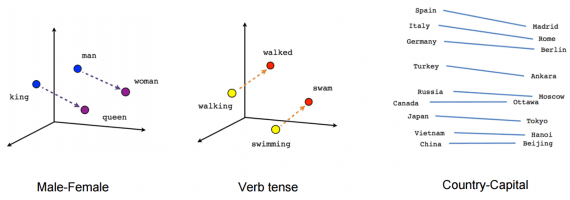

##Интересные особенности векторного представления

###Работа с векторами смыслов

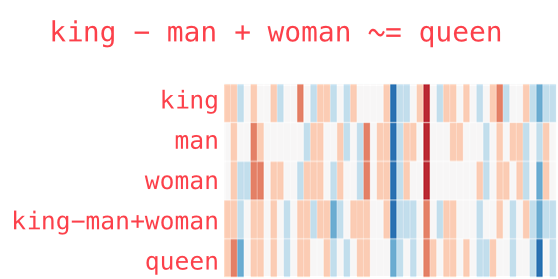

###Применение косинусного расстояния

Оно же коэффициент Отиаи, и рассчитывается как косинус угла между двумя векторами. При этом для параллельных (одинаково направленных) векторов $cos~0^o = 1$, $cos~90^o = 0$, а остальные значения для острых углов находятся где-то в промежутке между этими числами, для тупых углов - отрицательны. То есть можно использовать это для оценки схожести смыслов.

## Обучение представления Word2Vec под собственную задачу

В этом разделе мы посмотрим, как можно попробовать обучить представление Word2Vec под свою задачу. Для этого мы возьмем расширенную базу отзывов, чтобы получить более совершенное представление.

In [ ]:
# Загрузка датасета с сайта
!wget http://dataudt.ru/datasets/texts/kinoposik_sentiment.csv

--2021-05-21 12:42:18--  http://dataudt.ru/datasets/texts/kinoposik_sentiment.csv
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 540230615 (515M) [application/octet-stream]
Saving to: ‘kinoposik_sentiment.csv’

kinoposik_sentiment 100%[===================>] 515.20M  18.4MB/s    in 29s     

2021-05-21 12:42:47 (17.9 MB/s) - ‘kinoposik_sentiment.csv’ saved [540230615/540230615]



In [ ]:
# загрузим "Большую" базу отзывов чтобы потом обучить на ней свой Word2Wec
df = pd.read_csv('/content/kinoposik_sentiment.csv')

In [ ]:
df.head()

,text,label
0,"Да, давно я не смотрела плохих зарубежных филь...",neg
1,"Знаете, всегда очень тяжело наблюдать за людьм...",pos
2,"Англия, начало XX века. Уединенный особняк на ...",neu
3,"Это уж прямо такое мини-мини - всего 3, но отл...",pos
4,Франция! Она вдохновляет. Она очаровывает. Дур...,pos


In [ ]:
# создадим функцию для предобработки текстов
# она похоже на ту, что мы уже использовали, 
# но сейчас мы не будем использовть лемматизацию
def simple_preprocess_russian(text):
    tokens = nltk.word_tokenize(text, language='russian')
    tokens = [i for i in tokens if (i not in '!"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~')]
    tokens = [i.replace("«", "").replace("»", "").replace("'", "").replace('"', "").replace('.', "") for i in tokens]
    tokens = [i.lower() for i in tokens]
    return tokens

In [ ]:
# Разобъем наш набор текстов на токены, для этого:
words = [] # создадим пустой список, в него будем добавлять списки слов
for review in df['text']: # проходим циклом по отзывам из нашего DataFrame
    ss = nltk.sent_tokenize(review,language="russian") # разбиваем отзывы на отдельные преложения
    for s in ss: # и для каждого предложения
        words.append(simple_preprocess_russian(s)) #извлекаем из него слова-токены

In [ ]:
len(words) # посмотрим на длину полученного списка (соответвтует количеству предожений)

2971072

In [ ]:
pprint(words[0], compact=True) # выведем на печать какую-нибудь из записей в нашем списке

['да', 'давно', 'я', 'не', 'смотрела', 'плохих', 'зарубежных', 'фильмов', 'а',
 'таких', 'неприятно', 'пошлых', 'не', 'видела', 'со', 'времён', '', 'третий',
 'лишний', '']


In [ ]:
# гиперпараметры для обучения Word2Vec
num_features = 100 #размность векторного пространства, в который будем переводить слова
min_word_count = 1 # сколько раз слово должно встретиться в текстах, что-бы мы брали его в расчет
num_workers = 4 
window_size = 4 # размер окна, из которого мы формируем контекст
subsampling = 1e-3 

w2v_my = Word2Vec(
       words,
       workers=num_workers,
       size = num_features,
       min_count=min_word_count,
       window = window_size,
       sample=subsampling)

w2v_my.init_sims(replace=True) # выполняется для очистки памяти, удаляет лишние данные модели, использовать только если не планируете дообучать

# сохраним нашу модель
w2v_my.save("/content/my_w2vmodel") 
w2v_my.wv.save_word2vec_format("/content/my_w2vmodel.w2v")

In [ ]:
# прочитаем сохраненную модель
w2v_my = Word2Vec.load("/content/my_w2vmodel")

In [ ]:
# вычислим, на что похоже "король" + "женщина" - "мужчина"
print(w2v_my.wv.most_similar(positive= ["король", "женщина"], negative=["мужчина"]))

[('королева', 0.7237198352813721), ('ведьма', 0.6869528889656067), ('принцесса', 0.6625694036483765), ('роза', 0.6508377194404602), ('василиса', 0.6454106569290161), ('родина', 0.6443272829055786), ('птичка', 0.6394045352935791), ('скрипка', 0.6372847557067871), ('италия', 0.6371188163757324), ('золушка', 0.6352737545967102)]


In [ ]:
# найдем близкие слова к слову "криминальный"
print(w2v_my.wv.most_similar(positive= ["криминальный"]))

[('шпионский', 0.8685033321380615), ('остросюжетный', 0.8495595455169678), ('мистический', 0.8448126316070557), ('детективный', 0.8410298824310303), ('молодёжный', 0.8391308784484863), ('фантастический', 0.8364391326904297), ('гангстерский', 0.8361027240753174), ('скандинавский', 0.835869550704956), ('вампирский', 0.8178449869155884), ('молодежный', 0.8164551258087158)]


In [ ]:
# найдем близкие слова к слову "траволта"
print(w2v_my.wv.most_similar(positive= ["траволта"]))

[('малкович', 0.9269030094146729), ('гудман', 0.8960304260253906), ('войт', 0.8812417984008789), ('легуизамо', 0.8669101595878601), ('галлахер', 0.858587920665741), ('хёрт', 0.8569141626358032), ('литгоу', 0.8559329509735107), ('бойега', 0.853026270866394), ('мэдден', 0.8525069952011108), ('кассаветис', 0.8482851386070251)]


In [ ]:
w2v_my['чтиво'] # посмотрим, что из себя представляет векторное представление слова "чтиво"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.06005942,  0.03666432,  0.02481987, -0.16384217,  0.05108347,
       -0.1808427 ,  0.00770229,  0.01162746, -0.11868174, -0.0450613 ,
       -0.11416426, -0.01847699, -0.00547487,  0.12104341, -0.13285379,
        0.00684235,  0.07693166, -0.05281183,  0.0680296 , -0.03233156,
        0.02088618, -0.26637152, -0.09805062,  0.13432522, -0.06202184,
        0.13333456, -0.10245682,  0.17264335, -0.06463344,  0.09420219,
        0.13333733,  0.17883328, -0.05863794,  0.08941621,  0.11618066,
       -0.01475724, -0.06769632, -0.11755405,  0.03023809,  0.05443812,
       -0.04073724, -0.08632454, -0.12651515,  0.0371932 , -0.02361751,
       -0.08096854,  0.01258045, -0.06967922, -0.08445877, -0.09112711,
        0.31661043,  0.09201568, -0.05446261, -0.07453045, -0.11097059,
       -0.03798421, -0.03475703, -0.10302018, -0.08817235,  0.13699773,
       -0.006889  ,  0.15804875,  0.07971529, -0.08740469, -0.07328811,
        0.02926111, -0.04194409, -0.06706118, -0.10350588, -0.08

## Загрузка предобученных Word2Vec представлений

Итак, мы научились обучать и сохранять собственные представления. Но самое удобное для нас заключается в том, что очень много представлений **Word2Vec** уже обучены до нас и мы просто можем воспользоваться готовыми.
Покажем, как загружать готовые представления на примере **gensim.downloader**.

In [ ]:
list(api.info()['models'].keys()) #выведем список представлений, доступных для скачивания

['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']

In [ ]:
# загрузим предобученные представления для русского и английского языков
w2v_ru = api.load("word2vec-ruscorpora-300")
w2v_en = api.load("glove-wiki-gigaword-300")

[==================================================] 100.0% 198.8/198.8MB downloaded
[==================================================] 100.0% 376.1/376.1MB downloaded


In [ ]:
# проверим, чему равно король + женщина - мужчина
print(w2v_ru.most_similar(positive= ["король_NOUN", "женщина_NOUN"], negative=["мужчина_NOUN"]))

[('королева_NOUN', 0.7313904762268066), ('герцог_NOUN', 0.6502388715744019), ('принцесса_NOUN', 0.6266285181045532), ('герцогиня_NOUN', 0.6240381002426147), ('королевство_NOUN', 0.6094207167625427), ('зюдерманландский_ADJ', 0.6084389686584473), ('дурлахский_ADJ', 0.608166515827179), ('ульрик::элеонора_NOUN', 0.6073107123374939), ('максимилианов_NOUN', 0.6057004332542419), ('принц_NOUN', 0.5984029173851013)]


In [ ]:
# проверим чему равно king + woman - man
print(w2v_en.most_similar(positive= ["king", "woman"], negative=["man"]))

[('queen', 0.6713277101516724), ('princess', 0.5432624220848083), ('throne', 0.5386104583740234), ('monarch', 0.5347574949264526), ('daughter', 0.498025119304657), ('mother', 0.4956442713737488), ('elizabeth', 0.4832652509212494), ('kingdom', 0.47747087478637695), ('prince', 0.4668239951133728), ('wife', 0.4647327661514282)]


## Использование обученного представления Word2Vec в качестве Embedding слоя в Keras


Итак, мы имеем обученный Word2Vec. Как его использовать? Конечно, можно перевести наши слова в векторную форму и подавать их в модель. Но существует еще один способ - загрузить веса обученного Word2Vec в наш Enbedding слой.
Посмотрим, как это можно сделать.

In [ ]:
# произведем предобработку наших текстов
x_train_cleared = [' '.join(simple_preprocess_russian(text)) for text in x_train_raw]
x_test_cleared = [' '.join(simple_preprocess_russian(text)) for text in x_test_raw]

In [ ]:
NUM_WORDS = 20000 # максимальное количество слов
MAX_LEN_SEQ = 800 # длинна последовательности

# создадим tokenizer
tokenizer = Tokenizer(num_words=NUM_WORDS, # максимальное количество слов, которые будет учитывать наш токенайзер
                      filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', # символы, которые он токенайзер будет фильтровать
                      lower=True,  #приводятся ли все символы к нижнему регситру
                      split=' ',  # символ, по которому происходит разделение на слова (токены)
                      char_level=False,  # являются ли токенами отдельные буквы
                      oov_token='UNKNOWN' # токен для неизвестных слов 
                     )

# обучим токенайзер на обучающей выборке
tokenizer.fit_on_texts(x_train_cleared)

In [ ]:
# переведем наши тексты в последовательности
x_train_seq = tokenizer.texts_to_sequences(x_train_cleared)
x_test_seq = tokenizer.texts_to_sequences(x_test_cleared)
pprint(x_train_seq[0], compact=True)

[43, 18036, 12147, 152, 1681, 5475, 1313, 467, 465, 59, 1, 11761, 504, 468, 422,
 818, 1, 18957, 10797, 272, 1760, 1, 11, 1, 12582, 3, 165, 3338, 1272, 8003, 1,
 2, 4393, 13523, 11, 1, 3, 2542, 1055, 3, 21, 1, 27, 169, 899, 3424, 59, 7084,
 30, 3, 710, 200, 3, 4283, 9176, 2, 1, 7085, 63, 1148, 2233, 14563, 3, 14, 68,
 1, 17, 2295, 24, 7661, 7, 2044, 2062, 1, 1, 997, 17197, 13014, 2, 319, 119,
 1307, 327, 614, 1451, 3599, 45, 6153, 1, 346, 442, 83, 14044, 1, 1, 1, 6, 1,
 2508, 1, 146, 15188, 86, 1, 1, 2, 1, 4137, 3833, 133, 656, 1, 27, 1, 1, 1, 347,
 302, 157, 1773, 1374, 1, 289, 7, 337, 997, 1, 196, 5, 39, 5818, 1, 4035, 482,
 4, 1056, 55, 12, 15776, 1, 75, 30, 135, 18037, 713, 1277, 149, 9420, 13524,
 753, 8348, 3, 7086, 1, 1, 66, 1, 1277, 149, 628, 1925, 1291, 1, 984, 61, 6,
 3091, 319, 119, 63, 4, 954, 242, 405, 2986, 73, 2, 45, 20, 4621, 1, 5, 103,
 242, 980, 10, 40, 2, 20, 9421, 14, 1028, 24, 81, 5, 73, 218, 25, 7243, 2, 1833,
 1, 146, 133, 656, 7814, 2, 139, 19, 1, 10199, 1374, 3

In [ ]:
# выравняем длины последовательностей
x_train_emb = pad_sequences(x_train_seq, padding='post', maxlen=MAX_LEN_SEQ)
x_test_emb = pad_sequences(x_test_seq, padding='post', maxlen=MAX_LEN_SEQ)

In [ ]:
# объявим функцию для извлечения весов для Embedding из предобученного Word2Vec
def get_weight_matrix(embedding, vocab):
    # определим размер словаря
    vocab_size = NUM_WORDS+2
    # создадим матрицу нужной размерности
    weight_matrix = np.zeros((vocab_size, num_features))
    # проходим по словарю и сохраняем вектора, используя индексы из Tokenizer
    for word, i in vocab.items():
        if i <= vocab_size:
            try:
                weight_matrix[i] = embedding[word]
            except:
                print(f'word {word} not in vocabulary')
    return weight_matrix

embedding_vectors = get_weight_matrix(w2v_my, tokenizer.word_index)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


word UNKNOWN not in vocabulary
word аня not in vocabulary


In [ ]:
# создаем нашу модель
modelEmb = Sequential()
# добавляем Embedding слой, в котором в качестве весов используются даные из предобученного Word2Vec
my_emb = Embedding(NUM_WORDS+2, 100, weights=[embedding_vectors], input_length=MAX_LEN_SEQ, trainable=True)
modelEmb.add(my_emb)

# добавляем слой SpatialDropout1D для "прореживания" и борьбы с переобучением
modelEmb.add(SpatialDropout1D(0.5)) 
# добавим выравнивающий слой
modelEmb.add(Flatten())
# добавим Dense слой на 16 нейронов
modelEmb.add(Dense(16,  activation='relu'))
# добавим батч-нормализацию для борьбы с переобучением 
modelEmb.add(BatchNormalization())
# добавим прореживание для борьбы с переобучением
modelEmb.add(Dropout(0.2))
# добавим выходной полносвязный слой для классификации
modelEmb.add(Dense(n_classes,activation='softmax'))

# компилируем модель
modelEmb.compile(optimizer=Adam(learning_rate=0.001),  loss='categorical_crossentropy',  metrics=['accuracy'])
 
# выводим данные по модели
modelEmb.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 800, 100)          2000200   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 800, 100)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 80000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                1280016   
_________________________________________________________________
batch_normalization_2 (Batch (None, 16)                64        
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                

In [ ]:
# обучаем нашу модель
modelEmb.fit(x = x_train_emb,  y = y_train_01, epochs = 10, verbose = 1, validation_data= (x_test_emb, y_test_01))

Epoch 1/10
352/352 [==============================] - 12s 32ms/step - loss: 1.1854 - accuracy: 0.3863 - val_loss: 0.9790 - val_accuracy: 0.5109
Epoch 2/10
352/352 [==============================] - 11s 32ms/step - loss: 0.7713 - accuracy: 0.6713 - val_loss: 0.9765 - val_accuracy: 0.5171
Epoch 3/10
352/352 [==============================] - 11s 32ms/step - loss: 0.4406 - accuracy: 0.8585 - val_loss: 1.0598 - val_accuracy: 0.5011
Epoch 4/10
352/352 [==============================] - 11s 32ms/step - loss: 0.2525 - accuracy: 0.9205 - val_loss: 1.1292 - val_accuracy: 0.5352
Epoch 5/10
352/352 [==============================] - 11s 32ms/step - loss: 0.1716 - accuracy: 0.9455 - val_loss: 1.2452 - val_accuracy: 0.5435
Epoch 6/10
352/352 [==============================] - 11s 32ms/step - loss: 0.1278 - accuracy: 0.9588 - val_loss: 1.2616 - val_accuracy: 0.5301
Epoch 7/10
352/352 [==============================] - 11s 31ms/step - loss: 0.0939 - accuracy: 0.9705 - val_loss: 1.3210 - val_accuracy:

# Литература

1. [Подходы лемматизации с примерами на Python
](https://https://webdevblog.ru/podhody-lemmatizacii-s-primerami-v-python/)

2. [Gensim — Руководство для начинающих](https://webdevblog.ru/gensim-rukovodstvo-dlya-nachinajushhih/)

3. [Чудесный мир Word Embeddings: какие они бывают и зачем нужны?](https://habr.com/ru/company/ods/blog/329410/)

4. [Классификация документов: 7 практических подходов для небольших наборов данных](https://habr.com/ru/post/504744/)

5. [Отличная обзорная статья по подходам при обработке текстов](https://habr.com/ru/company/mailru/blog/358736/)

6. [Более специализированная статья по подходам при обработке текстов - языковые модели, рекуррентные слои, машинный перевод](https://neurohive.io/ru/osnovy-data-science/5-metodov-v-nlp-kotorye-izmenjat-obshhenie-v-budushhem/)